In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import graphviz

In [2]:
# Load the data
df = pd.read_csv('categorized1_df.csv')

In [3]:
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,Middle-Aged Adults,State-gov,Low Weight,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,Positive Capital Gain,No Capital Loss,Full-time,United States,<=50K
1,Middle-Aged Adults,Self-emp-not-inc,Low Weight,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,No Capital Gain,No Capital Loss,Minimal Work,United States,<=50K
2,Middle-Aged Adults,Private,Medium Weight,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,No Capital Gain,No Capital Loss,Full-time,United States,<=50K
3,Middle-Aged Adults,Private,Medium Weight,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,No Capital Gain,No Capital Loss,Full-time,United States,<=50K
4,Young Adults,Private,High Weight,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,No Capital Gain,No Capital Loss,Full-time,Central America/Caribbean,<=50K
5,Middle-Aged Adults,Private,High Weight,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,No Capital Gain,No Capital Loss,Full-time,United States,<=50K
6,Middle-Aged Adults,Private,Medium Weight,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,No Capital Gain,No Capital Loss,Minimal Work,Central America/Caribbean,<=50K
7,Middle-Aged Adults,Self-emp-not-inc,Medium Weight,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,No Capital Gain,No Capital Loss,Full-time,United States,>50K
8,Young Adults,Private,Low Weight,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,Positive Capital Gain,No Capital Loss,Extended Hours,United States,>50K
9,Middle-Aged Adults,Private,Medium Weight,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,Positive Capital Gain,No Capital Loss,Full-time,United States,>50K


In [4]:
# Create a list of the categorical columns
cat_cols = ['age', 'workclass', 'fnlwgt', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

In [5]:
# One-hot encode the categorical columns with boolean values
onehot_df = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols, dtype=bool)

In [6]:
# Define a dictionary to map the income values
income_map = {'<=50K': 0, '>50K': 1}

# Apply the map to the income column
onehot_df['income'] = onehot_df['income'].map(income_map)

In [7]:
# Print the first 5 rows of the encoded dataframe
onehot_df.head()

,education-num,income,age_Children,age_Middle-Aged Adults,age_Senior Adults,age_Young Adults,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,hours-per-week_Part-time,native-country_Asia,native-country_Canada,native-country_Central America/Caribbean,native-country_Eastern Europe,native-country_Mexico,native-country_Other,native-country_South America,native-country_United States,native-country_Western Europe
0,13,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,13,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,9,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,7,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,13,0,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


<Axes: >

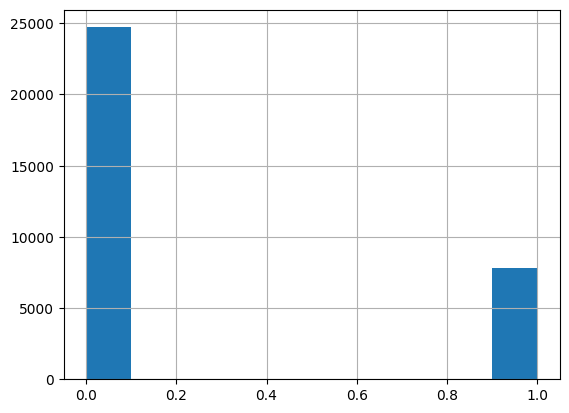

In [8]:
onehot_df['income'].hist()

In [9]:
# Convert the boolean values to integers
onehot_df = onehot_df.astype(int)

In [10]:
onehot_df.head()

,education-num,income,age_Children,age_Middle-Aged Adults,age_Senior Adults,age_Young Adults,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,hours-per-week_Part-time,native-country_Asia,native-country_Canada,native-country_Central America/Caribbean,native-country_Eastern Europe,native-country_Mexico,native-country_Other,native-country_South America,native-country_United States,native-country_Western Europe
0,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,13,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
# Import LogisticRegression and other modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split your data into features (X) and labels (y)
X = onehot_df.drop('income', axis=1) # drop the income column from the dataframe
y = onehot_df['income'] # use the income column as the label

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # use 20% of the data for testing

# Create an instance of the LogisticRegression class with your desired parameters
log_reg = LogisticRegression(max_iter=1000) # increase the max_iter parameter to ensure convergence

# Fit the model to the train data using the fit() method
log_reg.fit(X_train, y_train)

# Predict the labels for the test data using the predict() or predict_proba() methods
y_pred = log_reg.predict(X_test) # predict the class labels
y_pred_prob = log_reg.predict_proba(X_test) # predict the class probabilities

# Evaluate the model performance using various metrics such as accuracy, precision, recall, f1-score, roc_auc_score, etc.
print('Accuracy:', accuracy_score(y_test, y_pred)) # print the accuracy score
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred)) # print the confusion matrix
print('Classification report:\n', classification_report(y_test, y_pred)) # print the classification report


Accuracy: 0.8562874251497006
Confusion matrix:
 [[4607  335]
 [ 601  970]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.62      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [12]:
# Import LinearRegression and other modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split your data into features (X) and labels (y)
X = onehot_df.drop('income', axis=1) # drop the income column from the dataframe
y = onehot_df['income'] # use the income column as the label

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # use 20% of the data for testing

# Create an instance of the LinearRegression class with your desired parameters
lin_reg = LinearRegression()

# Fit the model to the train data using the fit() method
lin_reg.fit(X_train, y_train)

# Predict the labels for the test data using the predict() method
y_pred = lin_reg.predict(X_test)

# Evaluate the model performance using various metrics such as mean squared error, r-squared, adjusted r-squared, etc.
print('Mean squared error:', mean_squared_error(y_test, y_pred)) # print the mean squared error
print('R-squared:', r2_score(y_test, y_pred)) # print the r-squared score


Mean squared error: 0.11177754902998556
R-squared: 0.38928608874932114


In [13]:
# Import DecisionTreeClassifier and other modules
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split your data into features (X) and labels (y)
X = onehot_df.drop('income', axis=1) 
y = onehot_df['income'] 

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # use 20% of the data for testing

# Create an instance of the DecisionTreeClassifier class with your desired parameters
clf = tree.DecisionTreeClassifier()

# Fit the model to the train data using the fit() method
clf = clf.fit(X, y)

# Predict the labels for the test data using the predict() method
y_pred = clf.predict(X_test)

# Evaluate the model performance using various metrics such as accuracy, precision, recall, f1-score, roc_auc_score, etc.
print('Accuracy:', accuracy_score(y_test, y_pred)) # print the accuracy score
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred)) # print the confusion matrix
print('Classification report:\n', classification_report(y_test, y_pred)) # print the classification report

Accuracy: 0.9333640411484723
Confusion matrix:
 [[4814  128]
 [ 306 1265]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      4942
           1       0.91      0.81      0.85      1571

    accuracy                           0.93      6513
   macro avg       0.92      0.89      0.91      6513
weighted avg       0.93      0.93      0.93      6513



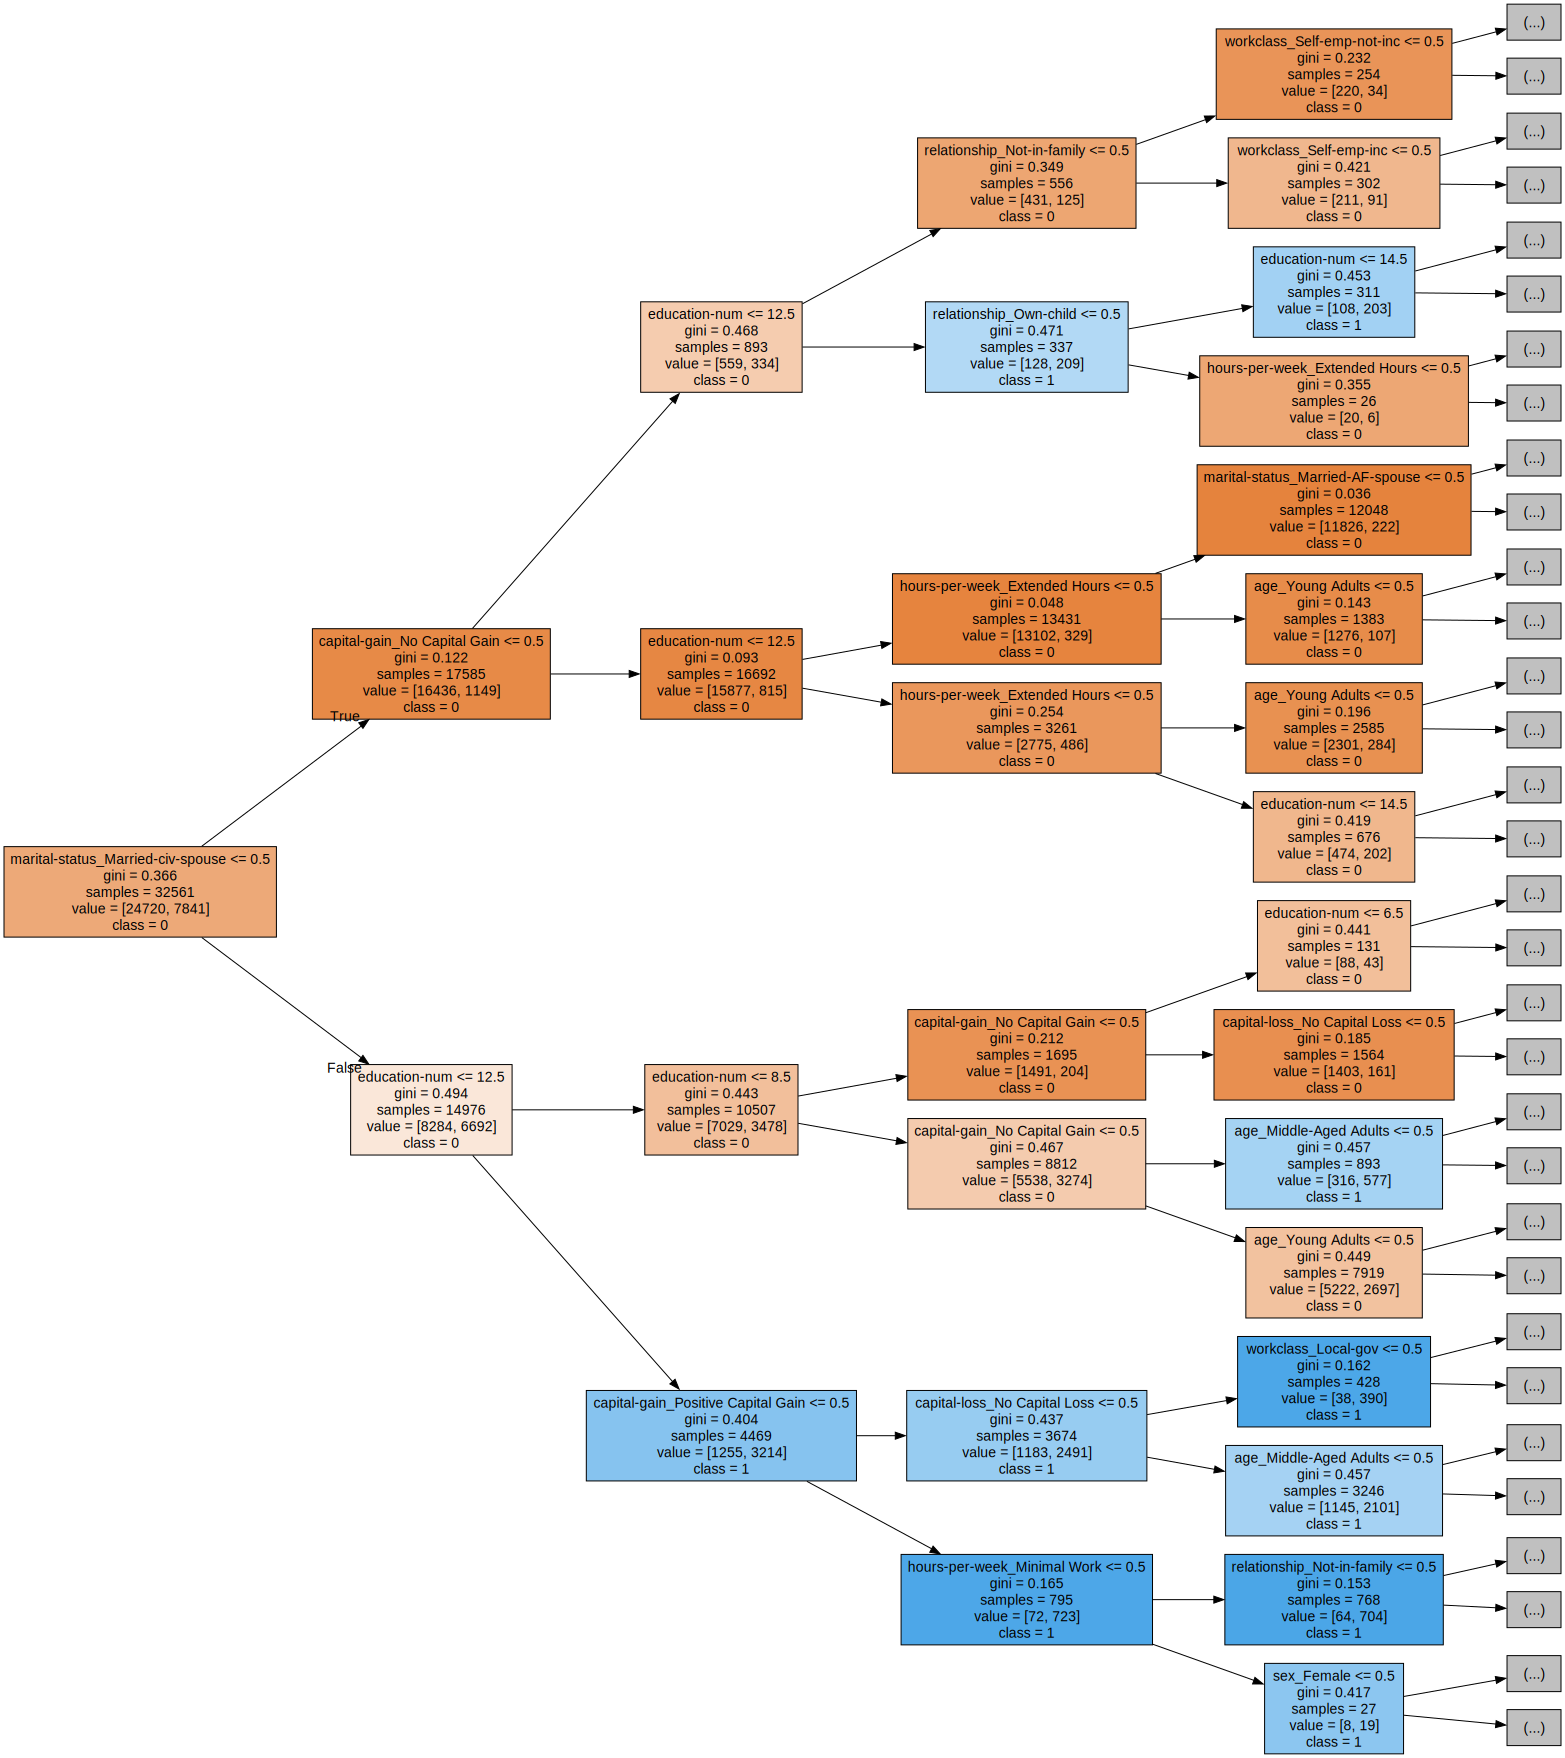

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=4,
                                feature_names=X_train.columns,  
                                class_names=['0', '1'],
                                filled=True,
                                rotate=True)
graph = graphviz.Source(dot_data, format="png") 
graph


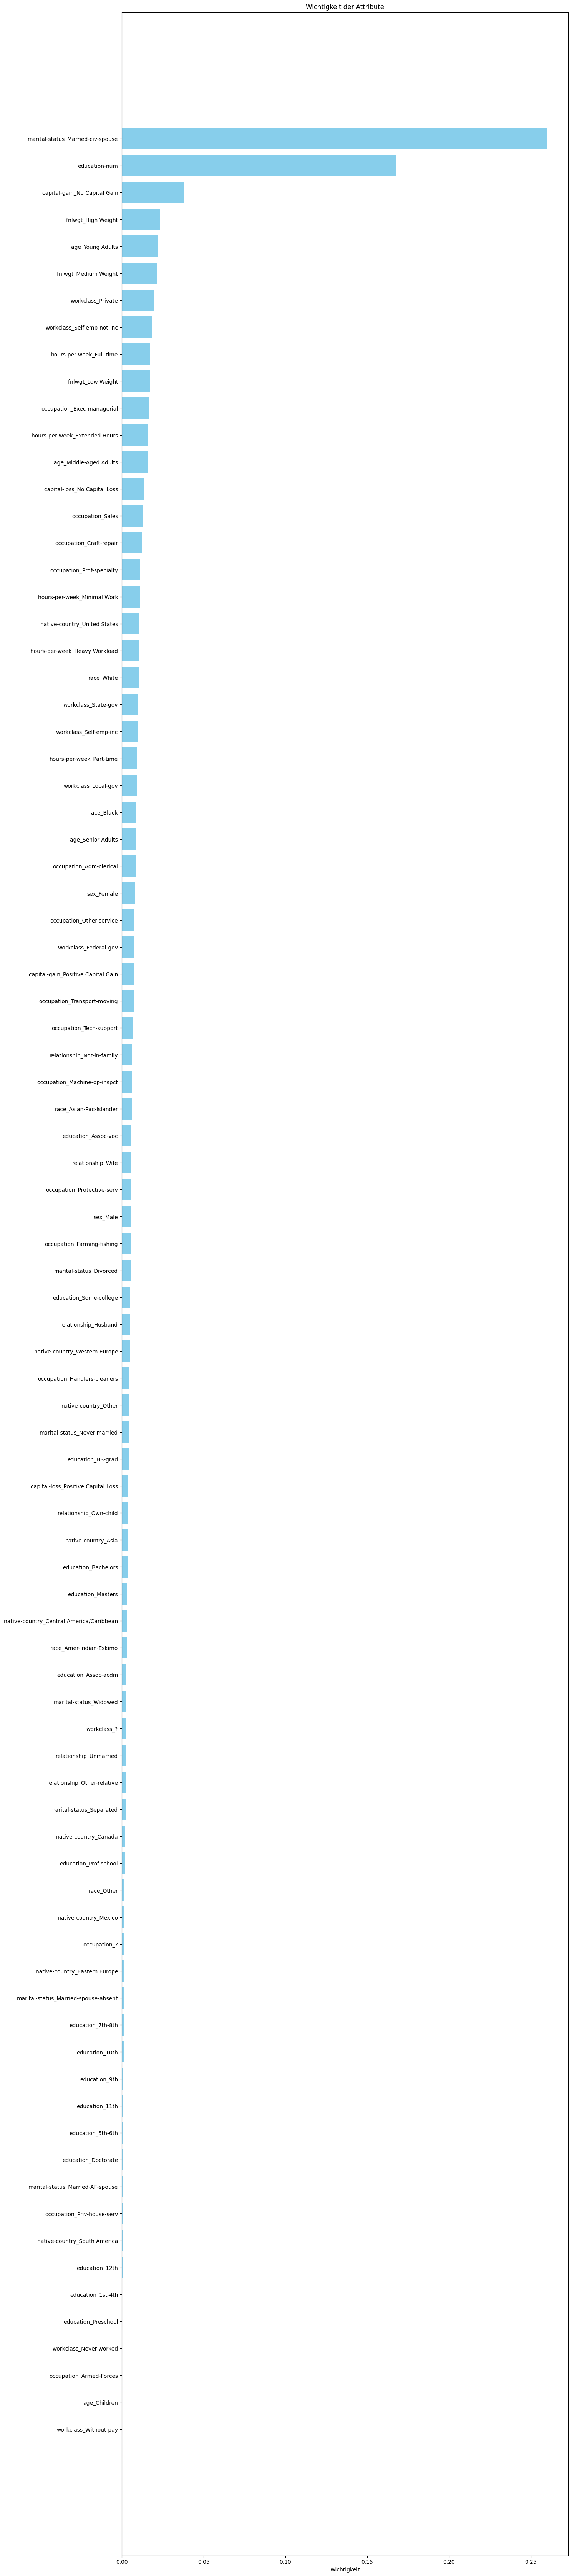

In [15]:
# Get feature importances
importances = clf.feature_importances_

# Get the feature names
features = X.columns

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'Features': features, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, len(importances_df))) # Set the figure size according to the number of features
plt.barh(importances_df['Features'], importances_df['Importance'], color='skyblue')
plt.xlabel("Wichtigkeit")
plt.title("Wichtigkeit der Attribute")
plt.gca().invert_yaxis()
plt.show()



In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred)) 
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred)) 
print('Classification report:\n', classification_report(y_test, y_pred)) 


Accuracy: 0.5925072931060955
Confusion matrix:
 [[2378 2564]
 [  90 1481]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64      4942
           1       0.37      0.94      0.53      1571

    accuracy                           0.59      6513
   macro avg       0.66      0.71      0.58      6513
weighted avg       0.82      0.59      0.61      6513



In [17]:
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear')

# Train the model
clf.fit(X_train, y_train)

# Predict the response
y_pred = clf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred)) 
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred)) 
print('Classification report:\n', classification_report(y_test, y_pred)) 


Accuracy: 0.8515277138031629
Confusion matrix:
 [[4614  328]
 [ 639  932]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.59      0.66      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.85      6513



In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the model
knn.fit(X_train, y_train)

# Predict the response
y_pred = knn.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred)) 
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred)) 
print('Classification report:\n', classification_report(y_test, y_pred)) 


Accuracy: 0.8271150007676954
Confusion matrix:
 [[4479  463]
 [ 663  908]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4942
           1       0.66      0.58      0.62      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513



In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
814/814 [==============================] - 2s 1ms/step - loss: 0.3681 - accuracy: 0.8245
Epoch 2/100
814/814 [==============================] - 1s 1ms/step - loss: 0.3288 - accuracy: 0.8465
Epoch 3/100
814/814 [==============================] - 1s 1ms/step - loss: 0.3230 - accuracy: 0.8503
Epoch 4/100
814/814 [==============================] - 1s 1ms/step - loss: 0.3202 - accuracy: 0.8510
Epoch 5/100
814/814 [==============================] - 1s 1ms/step - loss: 0.3182 - accuracy: 0.8523
Epoch 6/100
814/814 [==============================] - 1s 1ms/step - loss: 0.3161 - accuracy: 0.8530
Epoch 7/100
814/814 [==============================] - 1s 1ms/step - loss: 0.3147 - accuracy: 0.8542
Epoch 8/100
814/814 [==============================] - 1s 1ms/step - loss: 0.3129 - accuracy: 0.8545
Epoch 9/100
814/814 [==============================] - 1s 1ms/step - loss: 0.3120 - accuracy: 0.8547
Epoch 10/100
814/814 [==============================] - 1s 1ms/step - loss: 0.3108 - accura

In [22]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


204/204 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8342
Test loss: 0.40371522307395935
Test accuracy: 0.8341777920722961


In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()
  model.add(layers.Dense(hp.Int('units', min_value=16, max_value=64, step=16), input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
  model.add(layers.Dense(1, activation='sigmoid'))  # Output layer
  model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), metrics=['accuracy'])
  return model

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5)
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 01m 38s]
val_accuracy: 0.8520153760910034

Best val_accuracy So Far: 0.8520153760910034
Total elapsed time: 00h 06m 33s
INFO:tensorflow:Oracle triggered exit


In [27]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

204/204 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.6435
Test Loss: 0.6154265403747559
Test Accuracy: 0.6434822678565979
